In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


In [2]:
listings = pd.read_csv("data/listings.csv")
prices = pd.read_csv("data/stock_prices.csv")
volumes = pd.read_csv("data/stock_volumes.csv")
market_caps = pd.read_csv("data/stock_mktcaps.csv")

In [3]:
len(listings["stock"].unique())

380

In [4]:
listings.groupby("stock").apply(len)
prices

,date,930060,699903,879841,314909,15362F,315452,884570,992762,879650,...,9511Z8,95335N,96147L,9664FT,9664FU,9911WP,9930FR,99142R,2569A8,2579PR
0,2003-01-02,25.50,1.47,5.80,32.08,9.90,6.14,5.63,1.99,1.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-01-03,25.70,1.47,5.80,32.70,9.80,6.14,5.50,2.04,1.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-01-06,25.60,1.47,5.80,33.35,9.80,6.19,5.50,2.13,1.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-01-07,25.50,1.47,5.75,35.50,9.80,6.19,5.50,2.20,1.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003-01-08,25.50,1.47,5.75,34.24,9.80,6.19,5.50,2.18,1.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4651,2021-06-24,99.28,0.02,7.60,134.00,57.01,6.00,7.08,0.39,1.92,...,1385.99,484.44,60.47,43.77,43.99,0.94,119.50,91.77,532.00,36.47
4652,2021-06-25,99.00,0.02,7.60,135.49,57.01,6.02,7.08,0.39,1.92,...,1379.04,491.00,59.50,44.25,43.95,0.93,120.33,90.98,535.10,37.12
4653,2021-06-28,97.65,0.02,7.60,131.65,57.01,5.69,7.08,0.39,1.92,...,1396.07,480.00,59.54,43.22,43.69,0.90,120.00,90.54,536.65,37.49
4654,2021-06-29,99.33,0.02,7.60,135.08,57.01,5.90,7.08,0.39,1.92,...,1424.84,479.20,59.52,43.37,44.03,0.95,117.51,90.12,536.65,38.05


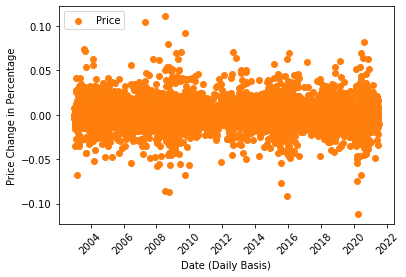

In [6]:
#Pass in stock and two optional parameters (start date and end date). Default params uses entire dataframe.
def price_change(stock, start="2003-01-02", end="2021-06-30"):
    
    prices = pd.read_csv("data/stock_prices.csv")
    #prices = prices[['date',stock]]
    prices = prices[[stock]].set_index(pd.to_datetime(prices["date"]))
    prices = prices.loc[start:end]
    #prices = prices.rename(columns={'930060': 'stock'})
    prices['daily_performance'] = prices[stock].pct_change().fillna(0)
    
    #plt.figure(figsize=(10, 10))
    plt.scatter(prices.reset_index()["date"],prices["daily_performance"], color='tab:orange', label="Price")
    plt.xticks(rotation = 45)
    plt.ylabel("Price Change in Percentage")
    plt.xlabel("Date (Daily Basis)")
    plt.legend(loc='upper left')
    

price_change("930060")



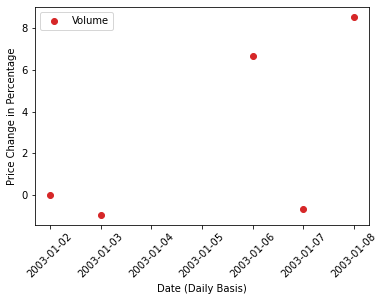

In [7]:
#Pass in stock and two optional parameters (start date and end date). Default params uses entire dataframe.
def volume_change(stock, start="2003-01-02", end="2021-06-30"):
    
    volumes = pd.read_csv("data/stock_volumes.csv")
    #prices = prices[['date',stock]]
    volumes = volumes[[stock]].set_index(pd.to_datetime(volumes["date"]))
    volumes = volumes.loc[start:end]
    #prices = prices.rename(columns={'930060': 'stock'})
    volumes['daily_performance'] = volumes[stock].pct_change().fillna(0)
    
    #plt.figure(figsize=(10, 10))
    plt.scatter(volumes.reset_index()["date"],volumes["daily_performance"], color='tab:red', label="Volume")
    plt.xticks(rotation = 45)
    plt.ylabel("Price Change in Percentage")
    plt.xlabel("Date (Daily Basis)")
    plt.legend(loc='upper left')
    

volume_change("930060","2003-01-02","2003-01-08")